### importing necesarry Libraries


In [81]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
df=pd.read_csv('car_ownership.csv')

In [85]:
df.head()

,monthly_salary,owns_car
0,22000,0
1,25000,0
2,47000,1
3,52000,0
4,46000,1


In [87]:
df.isnull().sum()

monthly_salary    0
owns_car          0
dtype: int64

In [89]:
df.shape

(27, 2)

In [135]:
df['owns_car'].unique()

array([0, 1], dtype=int64)

In [137]:
X=df[['monthly_salary']]
y=df['owns_car']

### model Evaluation and training


In [140]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [142]:
X_train.shape

(18, 1)

In [144]:
model=LogisticRegression(max_iter=2000)

In [146]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [148]:
y_pred=model.predict(X_test).tolist()

In [150]:
model.score(X_test,y_test)

0.8888888888888888

In [152]:
y_pred

[1, 0, 1, 0, 0, 0, 0, 1, 0]

In [154]:
y_test.tolist()

[1, 0, 1, 0, 0, 0, 1, 1, 0]

In [156]:
## We got 9 out of 10 correct predictions

### Accuracy,Recall,Precision,F1_score, Confusion_matrix

In [159]:
report=classification_report(y_test,y_pred)

In [161]:
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



In [163]:
model.predict_proba(X_test)

array([[0.04530932, 0.95469068],
       [0.80955349, 0.19044651],
       [0.05158003, 0.94841997],
       [0.86480041, 0.13519959],
       [0.91687254, 0.08312746],
       [0.82967465, 0.17032535],
       [0.87995016, 0.12004984],
       [0.07564619, 0.92435381],
       [0.84806892, 0.15193108]])

In [165]:
cm=confusion_matrix(y_test,y_pred)

In [167]:
cm

array([[5, 0],
       [1, 3]], dtype=int64)

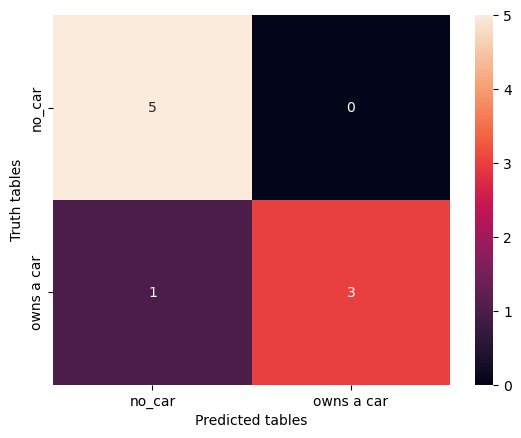

In [169]:
sns.heatmap(cm,xticklabels=['no_car','owns a car'],yticklabels=['no_car','owns a car'],annot=True)
plt.xlabel('Predicted tables')
plt.ylabel('Truth tables')
plt.show()

### Reverse mechanism

In [172]:
import math as m

In [178]:
def sigmoid(z):
    return 1/1+m.exp(-z)
def pred_fn(salary,model):
    z=model.intercept_+(model.coef_*salary)
    y=sigmoid(z[0][0])
    return y

In [182]:
X_test

,monthly_salary
8,62000
13,29000
9,61000
21,26000
0,22000
11,28000
16,25000
17,58000
12,27000


In [184]:
pred_fn(6200,model)

95.8918878823445